## Bounday values problem

Previously, we saw how to solve ODE when the initial value is provided. For example, if you are interested in solving the following equation for the interval $[0,20]$
$$
\frac{d^2f(x)}{dx^2} = \frac{df(x)}{dx} + 3
$$

you only need to know the values of $f(0)$ and $\dot{f}(0)$ to solve the problem. 

However, what if you have additional constrains, such as $f(20)=0$. This type of problems are known as bounday value problems. 

In general, assume that you want to solve the $n-th$ ODE given by 

$$
F\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2}, \frac{d^3f(x)}{dx^3}, \ldots, \frac{d^{n-1}f(x)}{dx^{n-1}}\right) = \frac{d^{n}f(x)}{dx^{n}},
$$
for the interval $x \in [a,b]$. To solve this problem, we need $n$ known boundary conditions at value $a$ and $b$. For example, to solve the second order ODE from above, we need boundary condition values specified at:

1. Two values of $f(x)$ are given, that is $f(a)$ and $f(b)$ are known

2. Two derivatives of $\dot{f}(x)$ are given, that is $\dot{f}(a)$ and $\dot{f}(b)$ are known

2. Or mixed conditions from the above two cases are known, that is either $f(a)$ and $\dot{f}(b)$ are known or $\dot{f}(a)$ and $f(b)$ are known.

Next, we will discuss different approaches to solve these problems.

### Shooting Methods

The shooting methods are developed with the goal of transforming the ODE boundary value problems to an equivalent initial value problems, then we can solve it using the methods we learned before.

Assume that you have a second order ODE 
$$
F\left(x, f(x), \frac{df(x)}{dx}\right) = \frac{d^{2}f(x)}{dx^{2}}
$$
with initial conditions $f(a)=f_a$ and $f(b)=f_b$.

The shoting method involves the following steps:
- Step 1: We start the whole process by guessing $\dot{f}(a)=α$, together with $f(a)=f_a$, we turn the above problem into an initial value problem with two conditions all on value $x=a$. **This is the aim step.**

- Step 2: we use the Runge-Kutta method, to integrate to the other boundary $b$ to find $f(b)=f_{\beta}$. **This is the shooting step.**

- Step 3: Now we compare the value of $f_{\beta}$ with $f_b$, usually our initial guess is not good, and $f_{\beta} \neq f_b$, but what we want is $f_{\beta}−fb=0$, therefore, we adjust our initial guesses and repeat. Until the error is acceptable, we can stop. **This is the iterative step.**


#### Example

You want to solve the following ODE 
$$
\frac{d^2y}{dt^2} = -10
$$
with the boundary conditions $y(0)=0$ and $y(5)=50$. 

Transforming into a first order ODE, we obtain 
$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & 1 \\
0 & -10/v(t)
\end{array}\right]S(t).
$$
with 
$$
S(t) = \left[\begin{array}{c} 
y(t) 
\\ v(t) 
\end{array}\right]
$$
and 
$$
\frac{dy(t)}{dt} = v(t)
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.style.use('seaborn')


Initial guess: $\dot{y}(0)=v(0)=56$

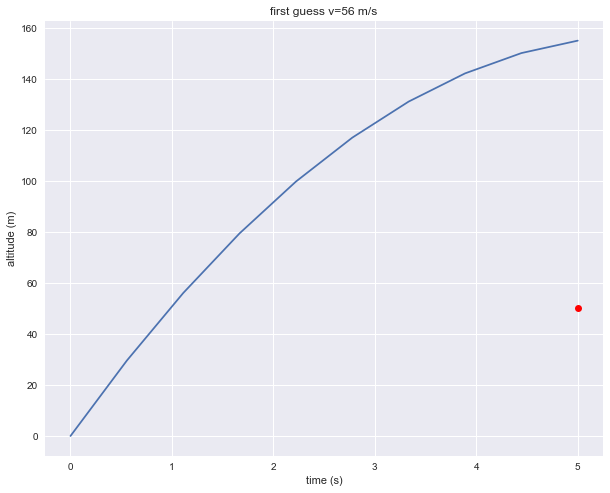

In [3]:
def func(t,s):
    
    dsdt = np.array([[0,1],[0, -10/s[1]]])@s
    return dsdt


y0 = 0
v0 = 56
t_eval = np.linspace(0, 5, 10)
sol = solve_ivp(func, [0, 5], [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.show()

From the figure we see that the first guess is too large, since with this velocity at $y(5)$ is more than 50. The red dot in the figure is the target we want to hit. Now let’s adjust our guess and increase the velocity to 10 m/s.

Second guess: $\dot{y}(0)=v(0)=10$

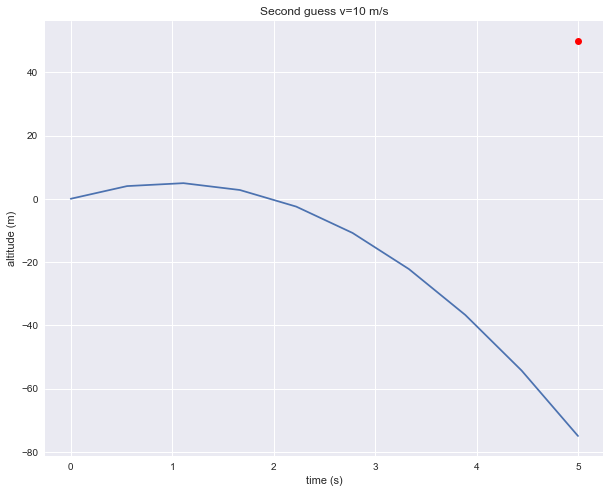

In [4]:
def func(t,s):
    
    dsdt = np.array([[0,1],[0, -10/s[1]]])@s
    return dsdt

t_span = np.linspace(0, 5, 100)
y0 = 0
v0 = 10
t_eval = np.linspace(0, 5, 10)
sol = solve_ivp(func, [0, 5], \
                [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'Second guess v={v0} m/s')
plt.show()

Now, we undershoot the taget!

the true values must be between the two extremes that we proposed. We can do a grid search and see where we get the closest to our target. 

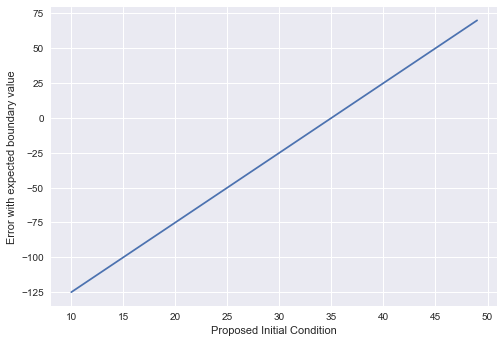

In [5]:
error = []
for i in range(10, 50):
    v0 = i
    sol = solve_ivp(func, [0, 5], \
                [y0, v0], t_eval = t_eval)
    error.append(sol.y[0][-1] - 50)

plt.plot(range(10, 50), error)
plt.xlabel('Proposed Initial Condition')
plt.ylabel('Error with expected boundary value')
plt.show()

Clearly the solution is around $v(0)=35$

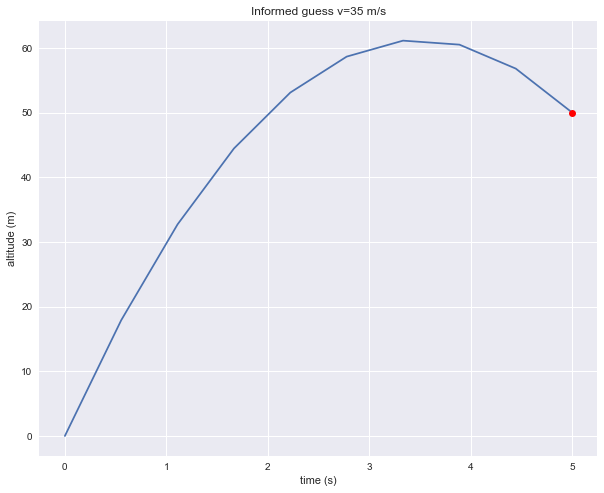

In [6]:
def func(t,s):
    
    dsdt = np.array([[0,1],[0, -10/s[1]]])@s
    return dsdt

t_span = np.linspace(0, 5, 100)
y0 = 0
v0 = 35
t_eval = np.linspace(0, 5, 10)
sol = solve_ivp(func, [0, 5], \
                [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'Informed guess v={v0} m/s')
plt.show()

### Python Solver

Python includes algorithms to solve boundary problems. In particular, the function ```solve_bvp``` from scipy can be used to solve boundary value problems. 

```python 
solve_bvp(func, b_0, t_eval=time_vector)
```
where
```python
func -> Function to solve
t_span -> The interval of integration [t_0,t_end]
s0 -> Initial conditions
method -> Method used to solve the ODE (default is 'RK45')
t_eval -> time vector to perform integration 
```

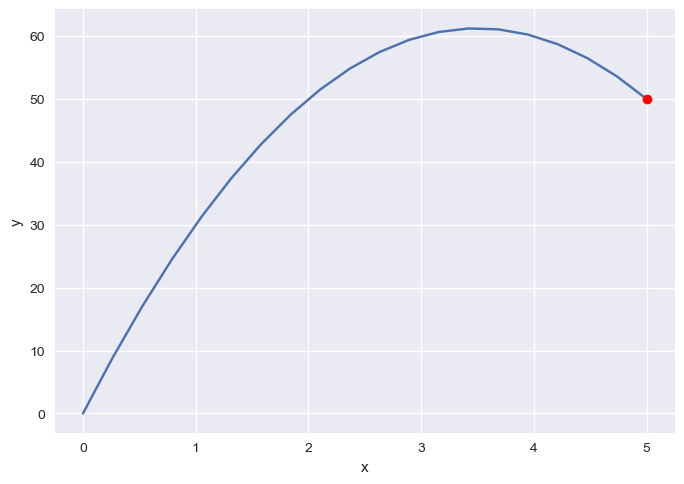

In [106]:
from scipy.integrate import solve_bvp

def funct(x,y):
    dydt0 = y[1]
    dydt1 = -10*np.ones_like(y[0])
    return [dydt0, dydt1]

def bc(ya, yb):
    #value of y at a is 0
    #value of y at b is 50
    return np.array([ya[0]-0, yb[0]-50])


t = np.linspace(0, 5, 11)

y_a= np.zeros((2, t.size)) #initial guess

#python solver
sol= solve_bvp(funct, bc, t, y_a)

x_plot = np.linspace(0, 5, 20)
y_plot = sol.sol(x_plot)[0]
plt.plot(x_plot, y_plot)
plt.plot(5, 50, 'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.show()